In [1]:
import numpy as np
from pandas import Series
import seaborn as sns
import pandas as pd #the csv reading library
import matplotlib.pyplot as plt #the ploting library
import glob #to get file names
import scipy.optimize
from scipy.optimize import curve_fit
from scipy import interpolate
from scipy.interpolate import pchip_interpolate
import math
from pandas import Series
from lmfit import Model, Parameter, report_fit
import scipy.ndimage
from scipy.ndimage import gaussian_filter1d
from scipy.signal import savgol_filter
from numpy import ones,vstack
from numpy.linalg import lstsq

In [2]:
# Read Excel file and convert it to CSV
excel_file = '../Dissertation_projects/Data/CNS/EXCEL_EXPORTS/GOM21FA_St.2_HCL_areas.XLS'
csv_file = '../Dissertation_projects/Data/CNS/EXPORTS/CSV_EXPORT/GOM21FA_St.2_HCL_areas.csv'

df = pd.read_excel(excel_file)
df.to_csv(csv_file, index=False, header=False)

# Read CSV file and create a DataFrame
column_names = ['name', 'file', 'date', 'time', 'type', 'wtd', 'Unnamed_1', 'Unnamed_2', 'Unnamed_3','Unnamed_4', 'N_area', 'C_area', 'S_area']  # Replace with your desired column names
df = pd.read_csv(csv_file, names=column_names)

# Now you can work with the DataFrame
CAMP = "GOM21FA" 
STN = "St.2"
TREAT = "HCL"
str_id = 'GOM'

#Save_name = '../Dissertation_projects/Data/CNS/Data/GOM22SP_HCL_St.14_HCL.csv'
#plot_Save_name = '../Dissertation_projects/Data/CNS/Data/curve_GOM22SP_HCL_St.14_HCL.png'

Save_name = '../Dissertation_projects/Data/CNS/EXPORTS/FINALIZED_DATA/GOM21FA_St.2_HCL.csv'
plot_Save_name = '../Dissertation_projects/Data/CNS/EXPORTS/CURVE_PNG/GOM21FA_St.2_HCL.png'


WARNING *** file size (59432) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [3]:
df

,name,file,date,time,type,wtd,Unnamed_1,Unnamed_2,Unnamed_3,Unnamed_4,N_area,C_area,S_area
0,Blank,DfchA002,10/26/2023,15:57,Blank,NaN,NaN,NaN,NaN,NaN,0.000000e+00,1.474750e+04,0.0
0,Cystine_bypass,Cystine_bypass,10/26/2023,16:09,By-Pass,NaN,NaN,NaN,NaN,NaN,6.726349e+05,3.970618e+06,1377451.5
0,LOW STD,LOW STD,10/26/2023,16:21,STD,1.336,6.25,0.0,NaN,NaN,3.798480e+05,2.289030e+06,813821.0
0,MID STD,MID STD,10/26/2023,16:33,STD,3.412,6.25,0.0,NaN,NaN,1.000870e+06,5.796814e+06,2057557.0
0,HIGH STD,HIGH STD,10/26/2023,16:46,STD,6.118,6.25,0.0,NaN,NaN,1.791049e+06,1.032596e+07,3749180.0
0,Blank,DfchA007,10/26/2023,16:58,Blank,NaN,NaN,NaN,NaN,NaN,0.000000e+00,1.465600e+04,0.0
0,Blank,DfchA008,10/26/2023,17:10,Blank,NaN,NaN,NaN,NaN,NaN,0.000000e+00,1.094200e+04,0.0
0,Sample_bypass,Sample_bypass,10/26/2023,17:22,By-Pass,NaN,NaN,NaN,NaN,NaN,5.504847e+04,6.127630e+05,47233.0
0,GOM21FA_St.2_HCL_01,GOM21FA_St.2_HCL_01,10/26/2023,17:34,UNK,11.305,6.25,0.0,NaN,NaN,5.913217e+04,7.988131e+05,50067.0
0,GOM21FA_St.2_HCL_02,GOM21FA_St.2_HCL_02,10/26/2023,17:46,UNK,9.461,6.25,0.0,NaN,NaN,4.946428e+04,6.491645e+05,31707.0


In [4]:
# Calculate mean for rows where type is blank
blank_rows = df[df['type'] == 'Blank']
mean_values = blank_rows[['C_area', 'N_area', 'S_area']].mean()

# Subtract mean from respective columns and create new rows
df['N_area_bl'] = df['N_area'] #- mean_values['N_area']
df['C_area_bl'] = df['C_area'] #- mean_values['C_area']
df['S_area_bl'] = df['S_area'] #- mean_values['S_area']

In [5]:
# Calculate C N S wights 
std = df[df['type'] == 'STD']

# Subtract mean from respective columns and create new rows
std['N_wtd'] = std['wtd'] * .1165
std['C_wtd'] = std['wtd'] * .3
std['S_wtd'] = std['wtd'] * .2666

std

C:\Users\hmlbr\AppData\Local\Temp\ipykernel_14660\2391499534.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  std['N_wtd'] = std['wtd'] * .1165
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_14660\2391499534.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  std['C_wtd'] = std['wtd'] * .3
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_14660\2391499534.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

,name,file,date,time,type,wtd,Unnamed_1,Unnamed_2,Unnamed_3,Unnamed_4,N_area,C_area,S_area,N_area_bl,C_area_bl,S_area_bl,N_wtd,C_wtd,S_wtd
0,LOW STD,LOW STD,10/26/2023,16:21,STD,1.336,6.25,0.0,NaN,NaN,379848.000,2289030.0,813821.0,379848.000,2289030.0,813821.0,0.155644,0.4008,0.356178
0,MID STD,MID STD,10/26/2023,16:33,STD,3.412,6.25,0.0,NaN,NaN,1000869.750,5796814.0,2057557.0,1000869.750,5796814.0,2057557.0,0.397498,1.0236,0.909639
0,HIGH STD,HIGH STD,10/26/2023,16:46,STD,6.118,6.25,0.0,NaN,NaN,1791048.875,10325957.0,3749180.0,1791048.875,10325957.0,3749180.0,0.712747,1.8354,1.631059


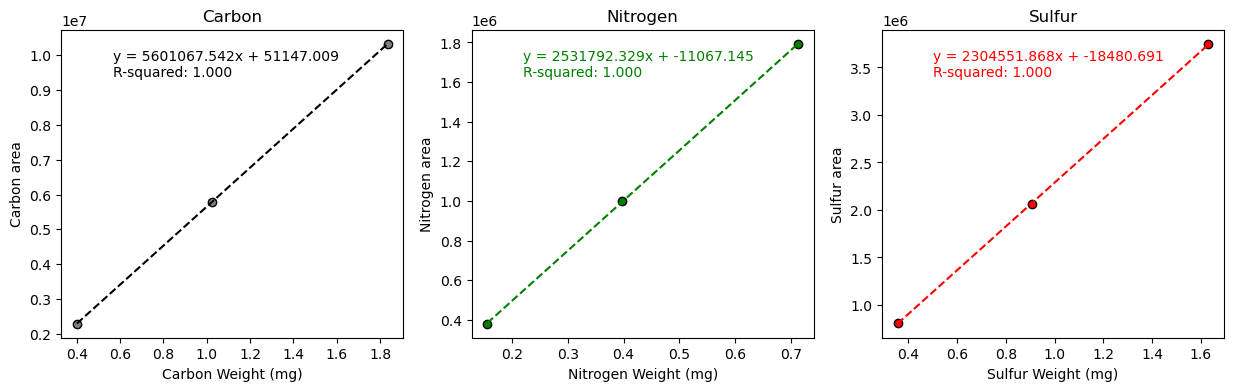

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Create figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Scatter plot and linear regression for C_wtd vs C_area
ax = axes[0]
ax.scatter(std['C_wtd'], std['C_area_bl'], facecolor='grey', edgecolor='black')
x = std['C_wtd']
y = std['C_area_bl']
coefficients = np.polyfit(x, y, 1)
slope = coefficients[0]
line = np.poly1d(coefficients)
ax.plot(x, line(x), color='black', linestyle='--')
residuals = y - line(x)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y - np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)
ax.set_xlabel('Carbon Weight (mg)')
ax.set_ylabel('Carbon area')
ax.set_title('Carbon')
equation = f"y = {slope:.3f}x + {coefficients[1]:.3f}"
r2_text = f"R-squared: {r_squared:.3f}"
ax.text(0.15, 0.90, equation, transform=ax.transAxes, fontsize=10, color='black')
ax.text(0.15, 0.85, r2_text, transform=ax.transAxes, fontsize=10, color='black')

# Scatter plot and linear regression for N_wtd vs N_area
ax = axes[1]
ax.scatter(std['N_wtd'], std['N_area_bl'], facecolor='green', edgecolor='black')
x = std['N_wtd']
y = std['N_area_bl']
coefficients = np.polyfit(x, y, 1)
slope = coefficients[0]
line = np.poly1d(coefficients)
ax.plot(x, line(x), color='green', linestyle='--')
residuals = y - line(x)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y - np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)
ax.set_xlabel('Nitrogen Weight (mg)')
ax.set_ylabel('Nitrogen area')
ax.set_title('Nitrogen')
equation = f"y = {slope:.3f}x + {coefficients[1]:.3f}"
r2_text = f"R-squared: {r_squared:.3f}"
ax.text(0.15, 0.90, equation, transform=ax.transAxes, fontsize=10, color='green')
ax.text(0.15, 0.85, r2_text, transform=ax.transAxes, fontsize=10, color='green')

# Scatter plot and linear regression for S_wtd vs S_area
ax = axes[2]
ax.scatter(std['S_wtd'], std['S_area_bl'], facecolor='red', edgecolor='black')
x = std['S_wtd']
y = std['S_area_bl']
coefficients = np.polyfit(x, y, 1)
slope = coefficients[0]
line = np.poly1d(coefficients)
ax.plot(x, line(x), color='red', linestyle='--')
residuals = y - line(x)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y - np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)
ax.set_xlabel('Sulfur Weight (mg)')
ax.set_ylabel('Sulfur area')
ax.set_title('Sulfur')
equation = f"y = {slope:.3f}x + {coefficients[1]:.3f}"
r2_text = f"R-squared: {r_squared:.3f}"
ax.text(0.15, 0.90, equation, transform=ax.transAxes, fontsize=10, color='red')
ax.text(0.15, 0.85, r2_text, transform=ax.transAxes, fontsize=10, color='red')

#save plot 
plt.savefig(plot_Save_name)

# show plot
plt.show()

In [7]:
y = std['C_wtd']
x = std['C_area_bl']
C_coefficients = np.polyfit(x, y, 1)
C_slope = C_coefficients[0]

y = std['N_wtd']
x = std['N_area_bl']
N_coefficients = np.polyfit(x, y, 1)
N_slope = N_coefficients[0]

y = std['S_wtd']
x = std['S_area_bl']
S_coefficients = np.polyfit(x, y, 1)
S_slope = S_coefficients[0]

print(f"SLOPE")
print(f"Carbon slope:   {C_slope}")
print(f"Nitrogen slope: {N_slope}")
print(f"Sulfur slope:   {S_slope}")
print(f"")

# Subtract mean from respective columns and create new rows
df['N_wtd'] = df['N_area_bl'] * N_slope
df['C_wtd'] = df['C_area_bl'] * C_slope
df['S_wtd'] = df['S_area_bl'] * S_slope

# Subtract mean from respective columns and create new rows
df['N%'] = df['N_wtd'] / df['wtd'] *100
df['C%'] = df['C_wtd'] / df['wtd'] *100
df['S%'] = df['S_wtd'] / df['wtd'] *100

cs = df[df['name'].str.contains('e_CS')]
cs['cs_N%'] = cs['N%']/ .1165 
cs['cs_C%'] = cs['C%']/ .3 
cs['cs_S%'] = cs['S%']/ .2666 

ca = df[df['name'].str.contains('3_CS')]
ca['ca_C%'] = ca['C%']/.1199 

print(f"Check Standerd % est")
print('Nitrogen')
print(cs['cs_N%'])
print('Carbon')
print(cs['cs_C%'])
print('Sulfer')
print(cs['cs_S%'])
print('CaCO3')
print(ca['ca_C%'])


SLOPE
Carbon slope:   1.7853611508428282e-07
Nitrogen slope: 3.949587278284917e-07
Sulfur slope:   4.3386186952755996e-07

Check Standerd % est
Nitrogen
0    101.992150
0    100.906308
Name: cs_N%, dtype: float64
Carbon
0    101.498611
0    101.112292
Name: cs_C%, dtype: float64
Sulfer
0    87.660038
0    90.762225
Name: cs_S%, dtype: float64
CaCO3
0    99.863461
0    99.972694
Name: ca_C%, dtype: float64


C:\Users\hmlbr\AppData\Local\Temp\ipykernel_14660\1124574679.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cs['cs_N%'] = cs['N%']/ .1165
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_14660\1124574679.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cs['cs_C%'] = cs['C%']/ .3
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_14660\1124574679.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

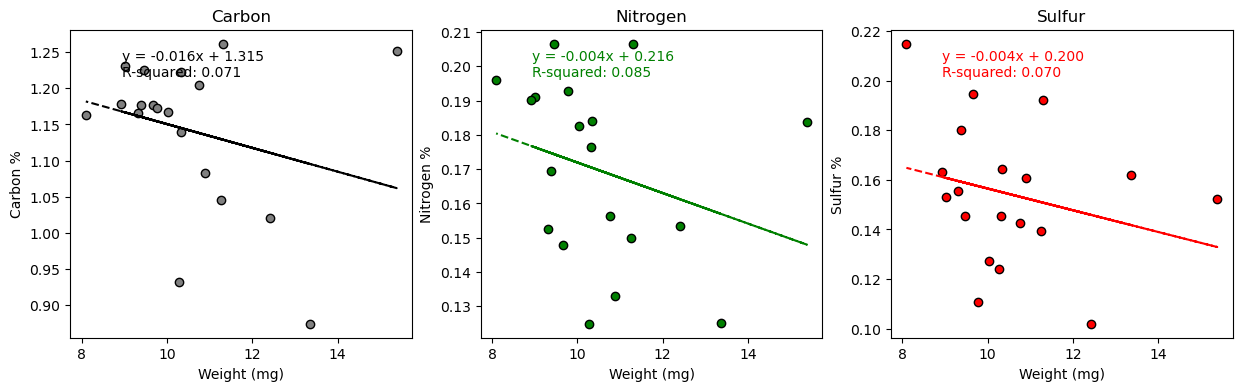

In [8]:
df = df[df['name'].str.contains(str_id)]

# Create figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

df = df.dropna(subset=["C%"])

# Scatter plot and linear regression for C_wtd vs C_area
ax = axes[0]
ax.scatter(df['wtd'], df['C%'], facecolor='grey', edgecolor='black')
x = df['wtd']
y = df['C%']
coefficients = np.polyfit(x, y, 1)
slope = coefficients[0]
line = np.poly1d(coefficients)
ax.plot(x, line(x), color='black', linestyle='--')
residuals = y - line(x)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y - np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)
ax.set_xlabel('Weight (mg)')
ax.set_ylabel('Carbon %')
ax.set_title('Carbon')
equation = f"y = {slope:.3f}x + {coefficients[1]:.3f}"
r2_text = f"R-squared: {r_squared:.3f}"
ax.text(0.15, 0.90, equation, transform=ax.transAxes, fontsize=10, color='black')
ax.text(0.15, 0.85, r2_text, transform=ax.transAxes, fontsize=10, color='black')

# Scatter plot and linear regression for N_wtd vs N_area
ax = axes[1]
ax.scatter(df['wtd'], df['N%'], facecolor='green', edgecolor='black')
x = df['wtd']
y = df['N%']
coefficients = np.polyfit(x, y, 1)
slope = coefficients[0]
line = np.poly1d(coefficients)
ax.plot(x, line(x), color='green', linestyle='--')
residuals = y - line(x)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y - np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)
ax.set_xlabel('Weight (mg)')
ax.set_ylabel('Nitrogen %')
ax.set_title('Nitrogen')
equation = f"y = {slope:.3f}x + {coefficients[1]:.3f}"
r2_text = f"R-squared: {r_squared:.3f}"
ax.text(0.15, 0.90, equation, transform=ax.transAxes, fontsize=10, color='green')
ax.text(0.15, 0.85, r2_text, transform=ax.transAxes, fontsize=10, color='green')

# Scatter plot and linear regression for S_wtd vs S_area
ax = axes[2]
ax.scatter(df['wtd'], df['S%'], facecolor='red', edgecolor='black')
x = df['wtd']
y = df['S%']
coefficients = np.polyfit(x, y, 1)
slope = coefficients[0]
line = np.poly1d(coefficients)
ax.plot(x, line(x), color='red', linestyle='--')
residuals = y - line(x)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y - np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)
ax.set_xlabel('Weight (mg)')
ax.set_ylabel('Sulfur %')
ax.set_title('Sulfur')
equation = f"y = {slope:.3f}x + {coefficients[1]:.3f}"
r2_text = f"R-squared: {r_squared:.3f}"
ax.text(0.15, 0.90, equation, transform=ax.transAxes, fontsize=10, color='red')
ax.text(0.15, 0.85, r2_text, transform=ax.transAxes, fontsize=10, color='red')

# show plot
plt.show()

In [9]:
ds = df[df['name'].str.contains(str_id)]
ds['ID'] = ds['name'].str[17:]
ds['Treat'] = TREAT
ds['Camp'] = CAMP
ds['Station'] = STN
ds['notes'] = "leak test high"

selected_columns = ['ID', 'Treat', 'Camp', 'Station', 'N%', 'C%', 'S%', 'notes']
ds = ds[selected_columns]

ds.to_csv(Save_name, index=False, header=True)
ds

,ID,Treat,Camp,Station,N%,C%,S%,notes
0,01,HCL,GOM21FA,St.2,0.206588,1.261539,0.192147,leak test high
0,02,HCL,GOM21FA,St.2,0.206493,1.225022,0.145402,leak test high
0,03,HCL,GOM21FA,St.2,0.169385,1.177341,0.180057,leak test high
0,04,HCL,GOM21FA,St.2,0.147863,1.176461,0.194616,leak test high
0,05,HCL,GOM21FA,St.2,0.152491,1.165938,0.155634,leak test high
0,06,HCL,GOM21FA,St.2,0.156446,1.204951,0.142559,leak test high
0,07,HCL,GOM21FA,St.2,0.133009,1.082578,0.160803,leak test high
0,08,HCL,GOM21FA,St.2,0.149980,1.045687,0.139534,leak test high
0,09,HCL,GOM21FA,St.2,0.153315,1.021037,0.101966,leak test high
0,10,HCL,GOM21FA,St.2,0.124936,0.932609,0.123946,leak test high
